In [1]:
import spacy

In [2]:
nlp = spacy.load("en_core_web_sm")

C:\Users\lbeln\anaconda3\envs\3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
texts = [
    "The composition of an ecosystem is thought to be important for determining its resistance to invasion. Studies of natural ecosystems, from plant to microbial communities, have found that more diverse communities are more resistant to invasion. In some cases, more diverse communities resist invasion by more completely consuming the resources necessary for the invader. We show that Escherichia coli can successfully invade cultures of the alga Chlamydomonas reinhardtii (phototroph) or the ciliate Tetrahymena thermophila (predator) but cannot invade a community where both are present. The invasion resistance of the algae-ciliate community arises from a higher-order interaction between species (interaction modification) that is unrelated to resource consumption. We show that the mode of this interaction is the algal inhibition of bacterial aggregation, which leaves bacteria vulnerable to predation. This mode requires both the algae and the ciliate to be present and provides an example of invasion resistance through an interaction modification.",
    "Trophic cascades are regarded as important signals for top-down control of food web dynamics. Although there is clear evidence supporting the existence of trophic cascades, the mechanisms driving this important dynamic are less clear. Trophic cascades could arise through direct population-level effects, in which predators prey on herbivores, thereby decreasing the abundance of herbivores that impact plant trophic levels. Trophic cascades could also arise through indirect behavioral-level effects, in which herbivore prey shift their foraging behavior in response to predation risk. Such behavioral shifts can result in reduced feeding time and increased starvation risk, again lowering the impact of herbivores on plants. We evaluated the relative importance of these two mechanisms, using field experiments in an old-field system composed of herbaceous plants, grasshopper herbivores, and spider predators. We created two treatments, Risk spiders that had their chelicerae glued, 0and Predation spiders that remained unmanipulated. We then systematically evaluated the impacts of these predator manipulations at behavioral, population, and food web scales in experimental mesocosms. At the behavioral level, grasshoppers did not distinguish between Risk spiders and Predation spiders. Grasshoppers exhibited significant shifts in feeding-time budget in the presence of spiders vs. when alone. At the grasshopper population level, Risk spider and Predation spider treatments caused the same level of grasshopper mortality, which was significantly higher than mortality in a control without spiders, indicating that the predation effects were compensatory to risk effects. At the food web level, Risk spider and Predation spider treatments decreased the impact grasshoppers had on grass biomass, supporting the existence of a trophic cascade. Moreover, Risk spider and Predation spider treatments produced statistically similar effects, again indicating that predation effects on trophic dynamics were compensatory to risk effects. We conclude that indirect effects resulting from antipredator behavior can produce trophic-level effects that are similar in form and strength to those generated by direct predation events.",
    "Investigating how prey density influences a prey's combined predation risk from multiple predator species is critical for understanding the widespread importance of multiple predator effects. We conducted experiments that crossed six treatments consisting of zero, one, or two predator species (hellgrammites, greenside darters, and creek chubs) with three treatments in which we varied the density of mayfly prey. None of the multiple predator effects in our system were independent, and instead, the presence of multiple predator species resulted in risk reduction for the prey across both multiple predator combinations and all three levels of prey density. Risk reduction is likely to have population-level consequences for the prey, resulting in larger prey populations than would be predicted if the effects of multiple predator species were independent. For one of the two multiple predator combinations, the magnitude of risk reduction marginally increased with prey density. As a result, models predicting the combined risk from multiple predator species in this system will sometimes need to account for prey density as a factor influencing per-capita prey death rates.",
    "Prey in natural communities are usually shared by many predator species. How predators coexist while competing for the same prey is one of the fundamental questions in ecology. Here, we show that competing predator species may not only coexist on a single prey but even help each other to persist if they specialize on different life history stages of the prey. By changing the prey size distribution, a predator species may in fact increase the amount of prey available for its competitor. Surprisingly, a predator may not be able to persist at all unless its competitor is also present. The competitor thus significantly increases the range of conditions for which a particular predator can persist. This “emergent facilitation” is a long-term, population-level effect that results from asymmetric increases in the rate of prey maturation and reproduction when predation relaxes competition among prey. Emergent facilitation explains observations of correlated increases of predators on small and large conspecific prey as well as concordance in their distribution patterns. Our results suggest that emergent facilitation may promote the occurrence of complex, stable, community food webs and that persistence of these communities could critically depend on diversity within predator guilds.",
]

In [4]:
word_freq = {"All": {}}

for idx, text in enumerate(texts):
    doc = nlp(text)
    word_freq[idx] = {}
    
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        text = token.lemma_.lower()
        # Updating Total Frequency
        if text not in word_freq["All"]:
            word_freq["All"][text] = 0
        word_freq["All"][text] += 1
        
        # Updating Text's Frequency
        if text not in word_freq[idx]:
            word_freq[idx][text] = 0
        word_freq[idx][text] += 1

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plottable import Table

In [6]:
df = pd.DataFrame(data=word_freq)
df.fillna(0, inplace=True)
df.sort_values(by='All', ascending=False)

All    0    1     2    3
prey             20  0.0  2.0  10.0  8.0
predator         17  1.0  1.0   9.0  6.0
effects          12  0.0  9.0   3.0  0.0
level             9  0.0  7.0   1.0  1.0
species           9  1.0  0.0   5.0  3.0
...             ...  ...  ...   ...  ...
systematically    1  0.0  1.0   0.0  0.0
impacts           1  0.0  1.0   0.0  0.0
manipulations     1  0.0  1.0   0.0  0.0
scales            1  0.0  1.0   0.0  0.0
guilds            1  0.0  0.0   0.0  1.0

[261 rows x 5 columns]

In [7]:
df

All    0    1    2    3
composition    1  1.0  0.0  0.0  0.0
ecosystem      1  1.0  0.0  0.0  0.0
thought        1  1.0  0.0  0.0  0.0
important      3  1.0  2.0  0.0  0.0
determining    1  1.0  0.0  0.0  0.0
...          ...  ...  ...  ...  ...
persistence    1  0.0  0.0  0.0  1.0
critically     1  0.0  0.0  0.0  1.0
depend         1  0.0  0.0  0.0  1.0
diversity      1  0.0  0.0  0.0  1.0
guilds         1  0.0  0.0  0.0  1.0

[261 rows x 5 columns]

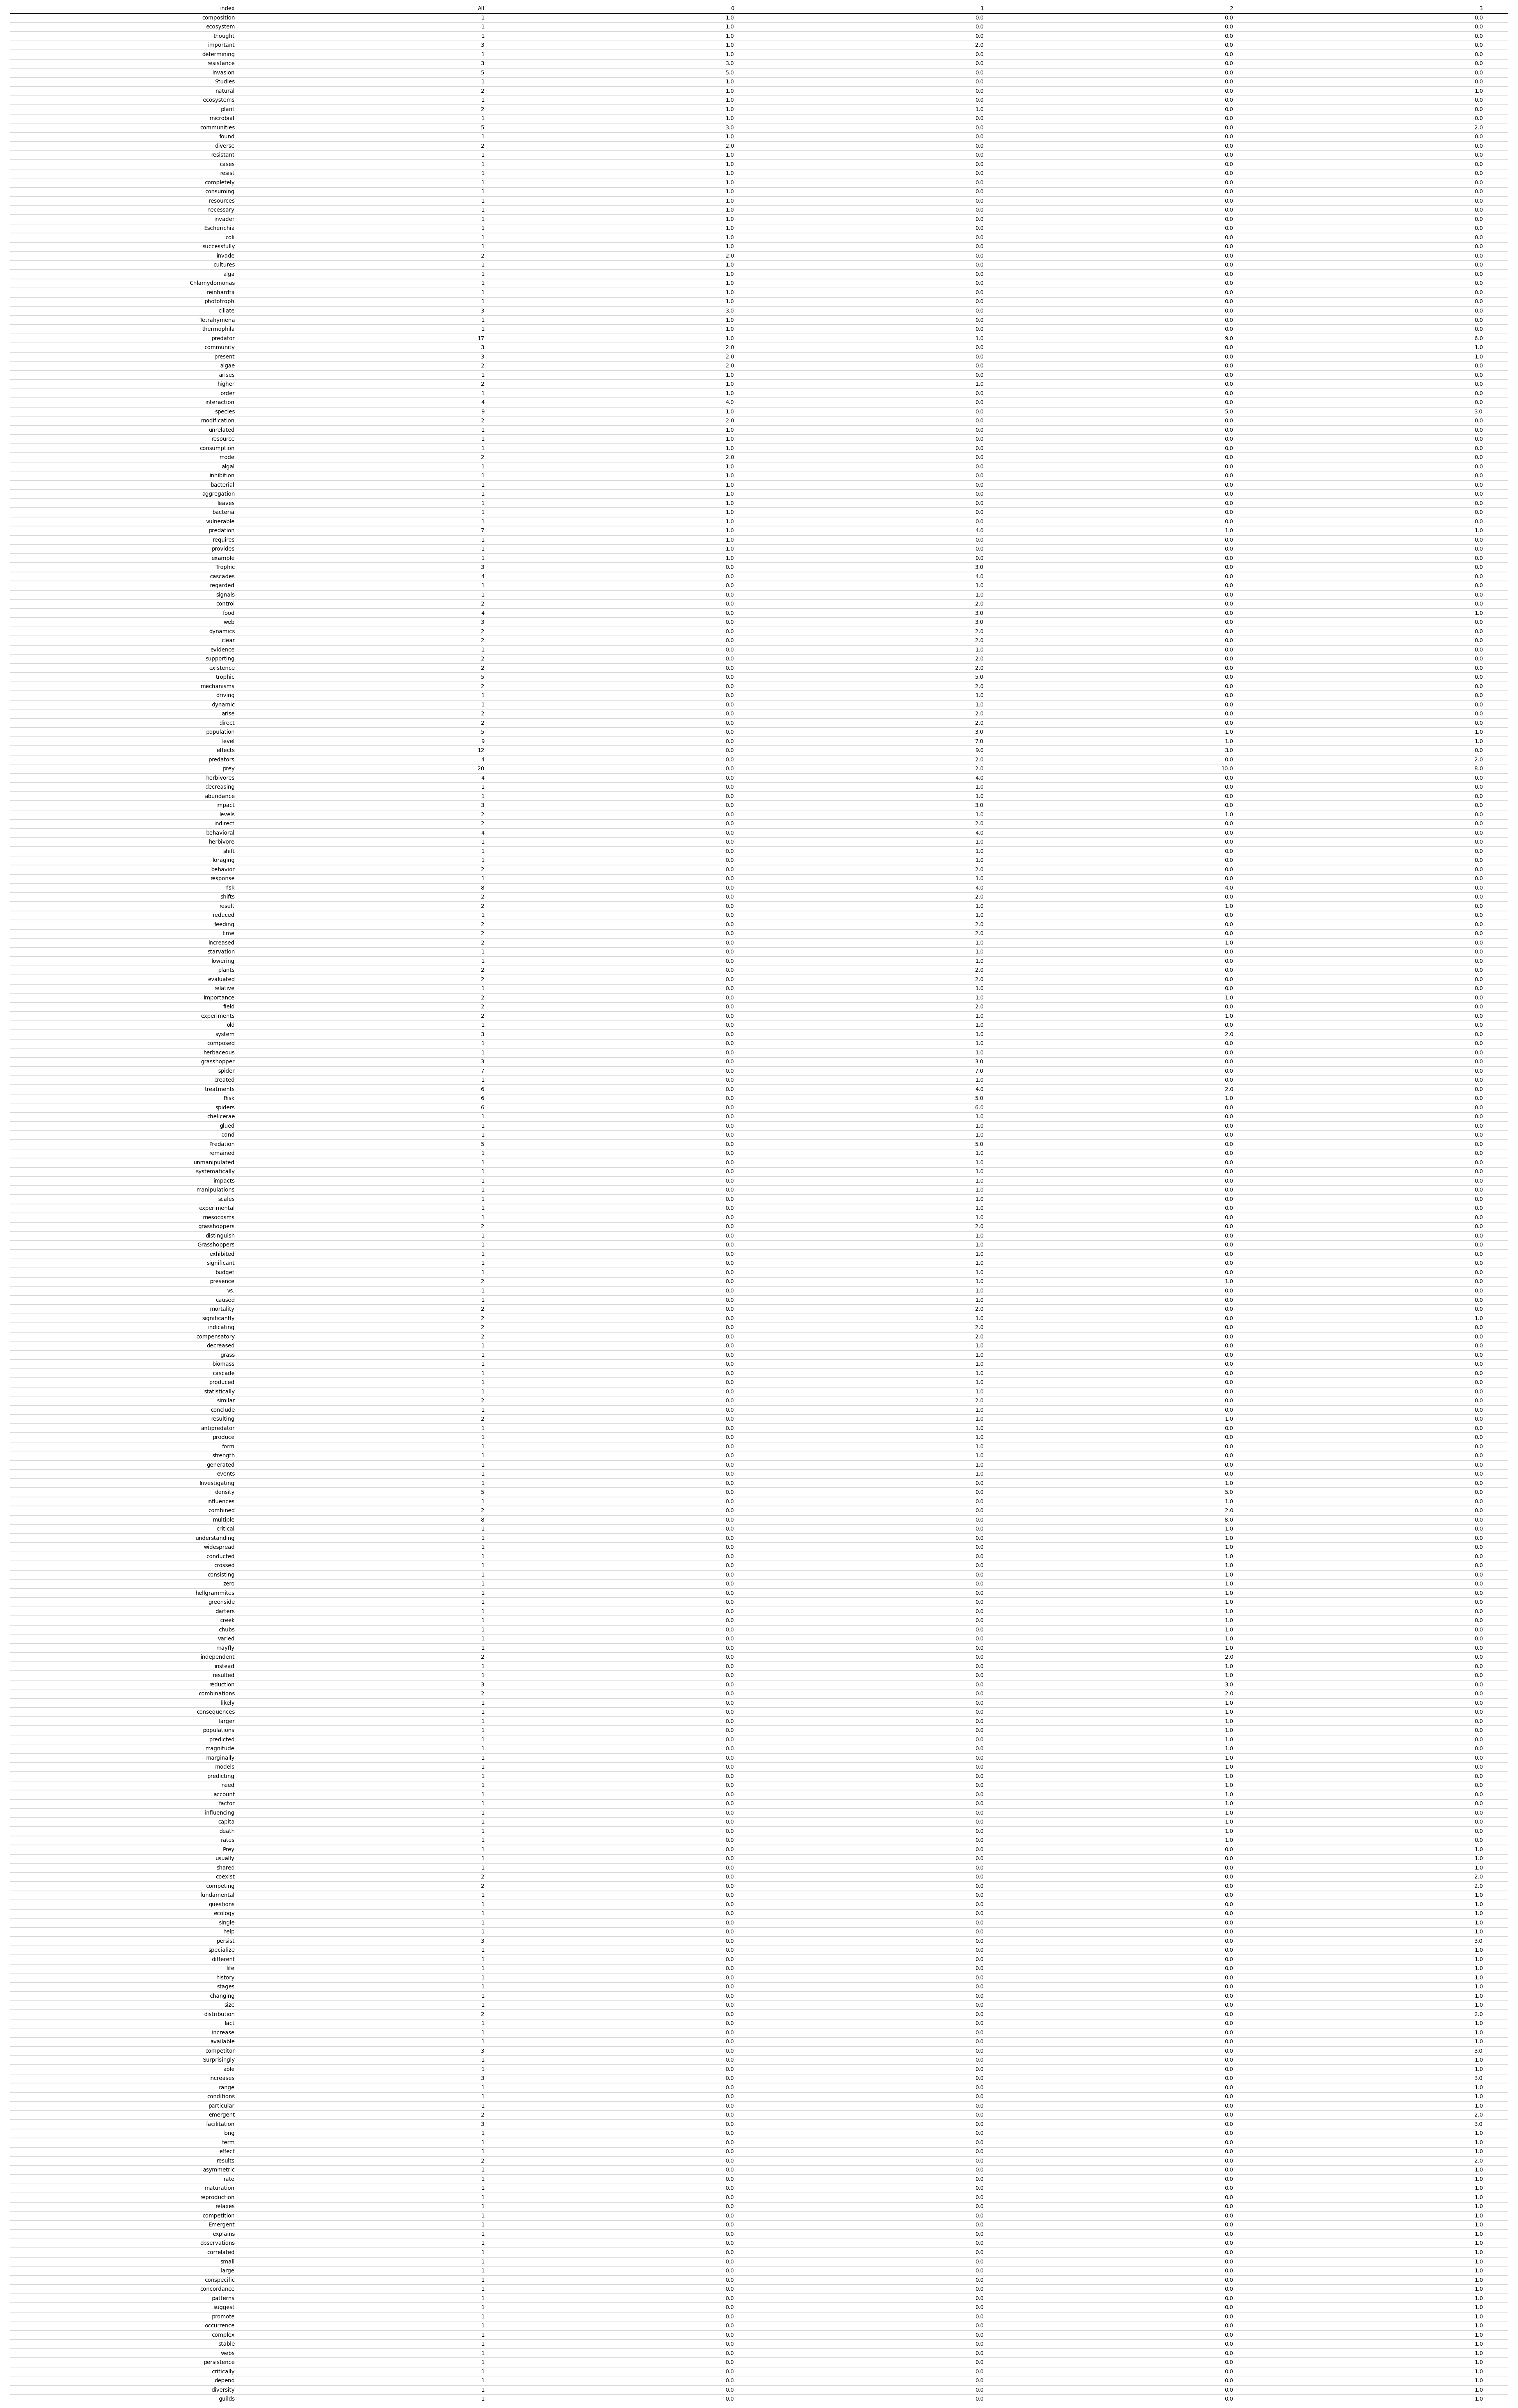

In [14]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(50, 80))
tab = Table(df)
plt.savefig('frequency.png')

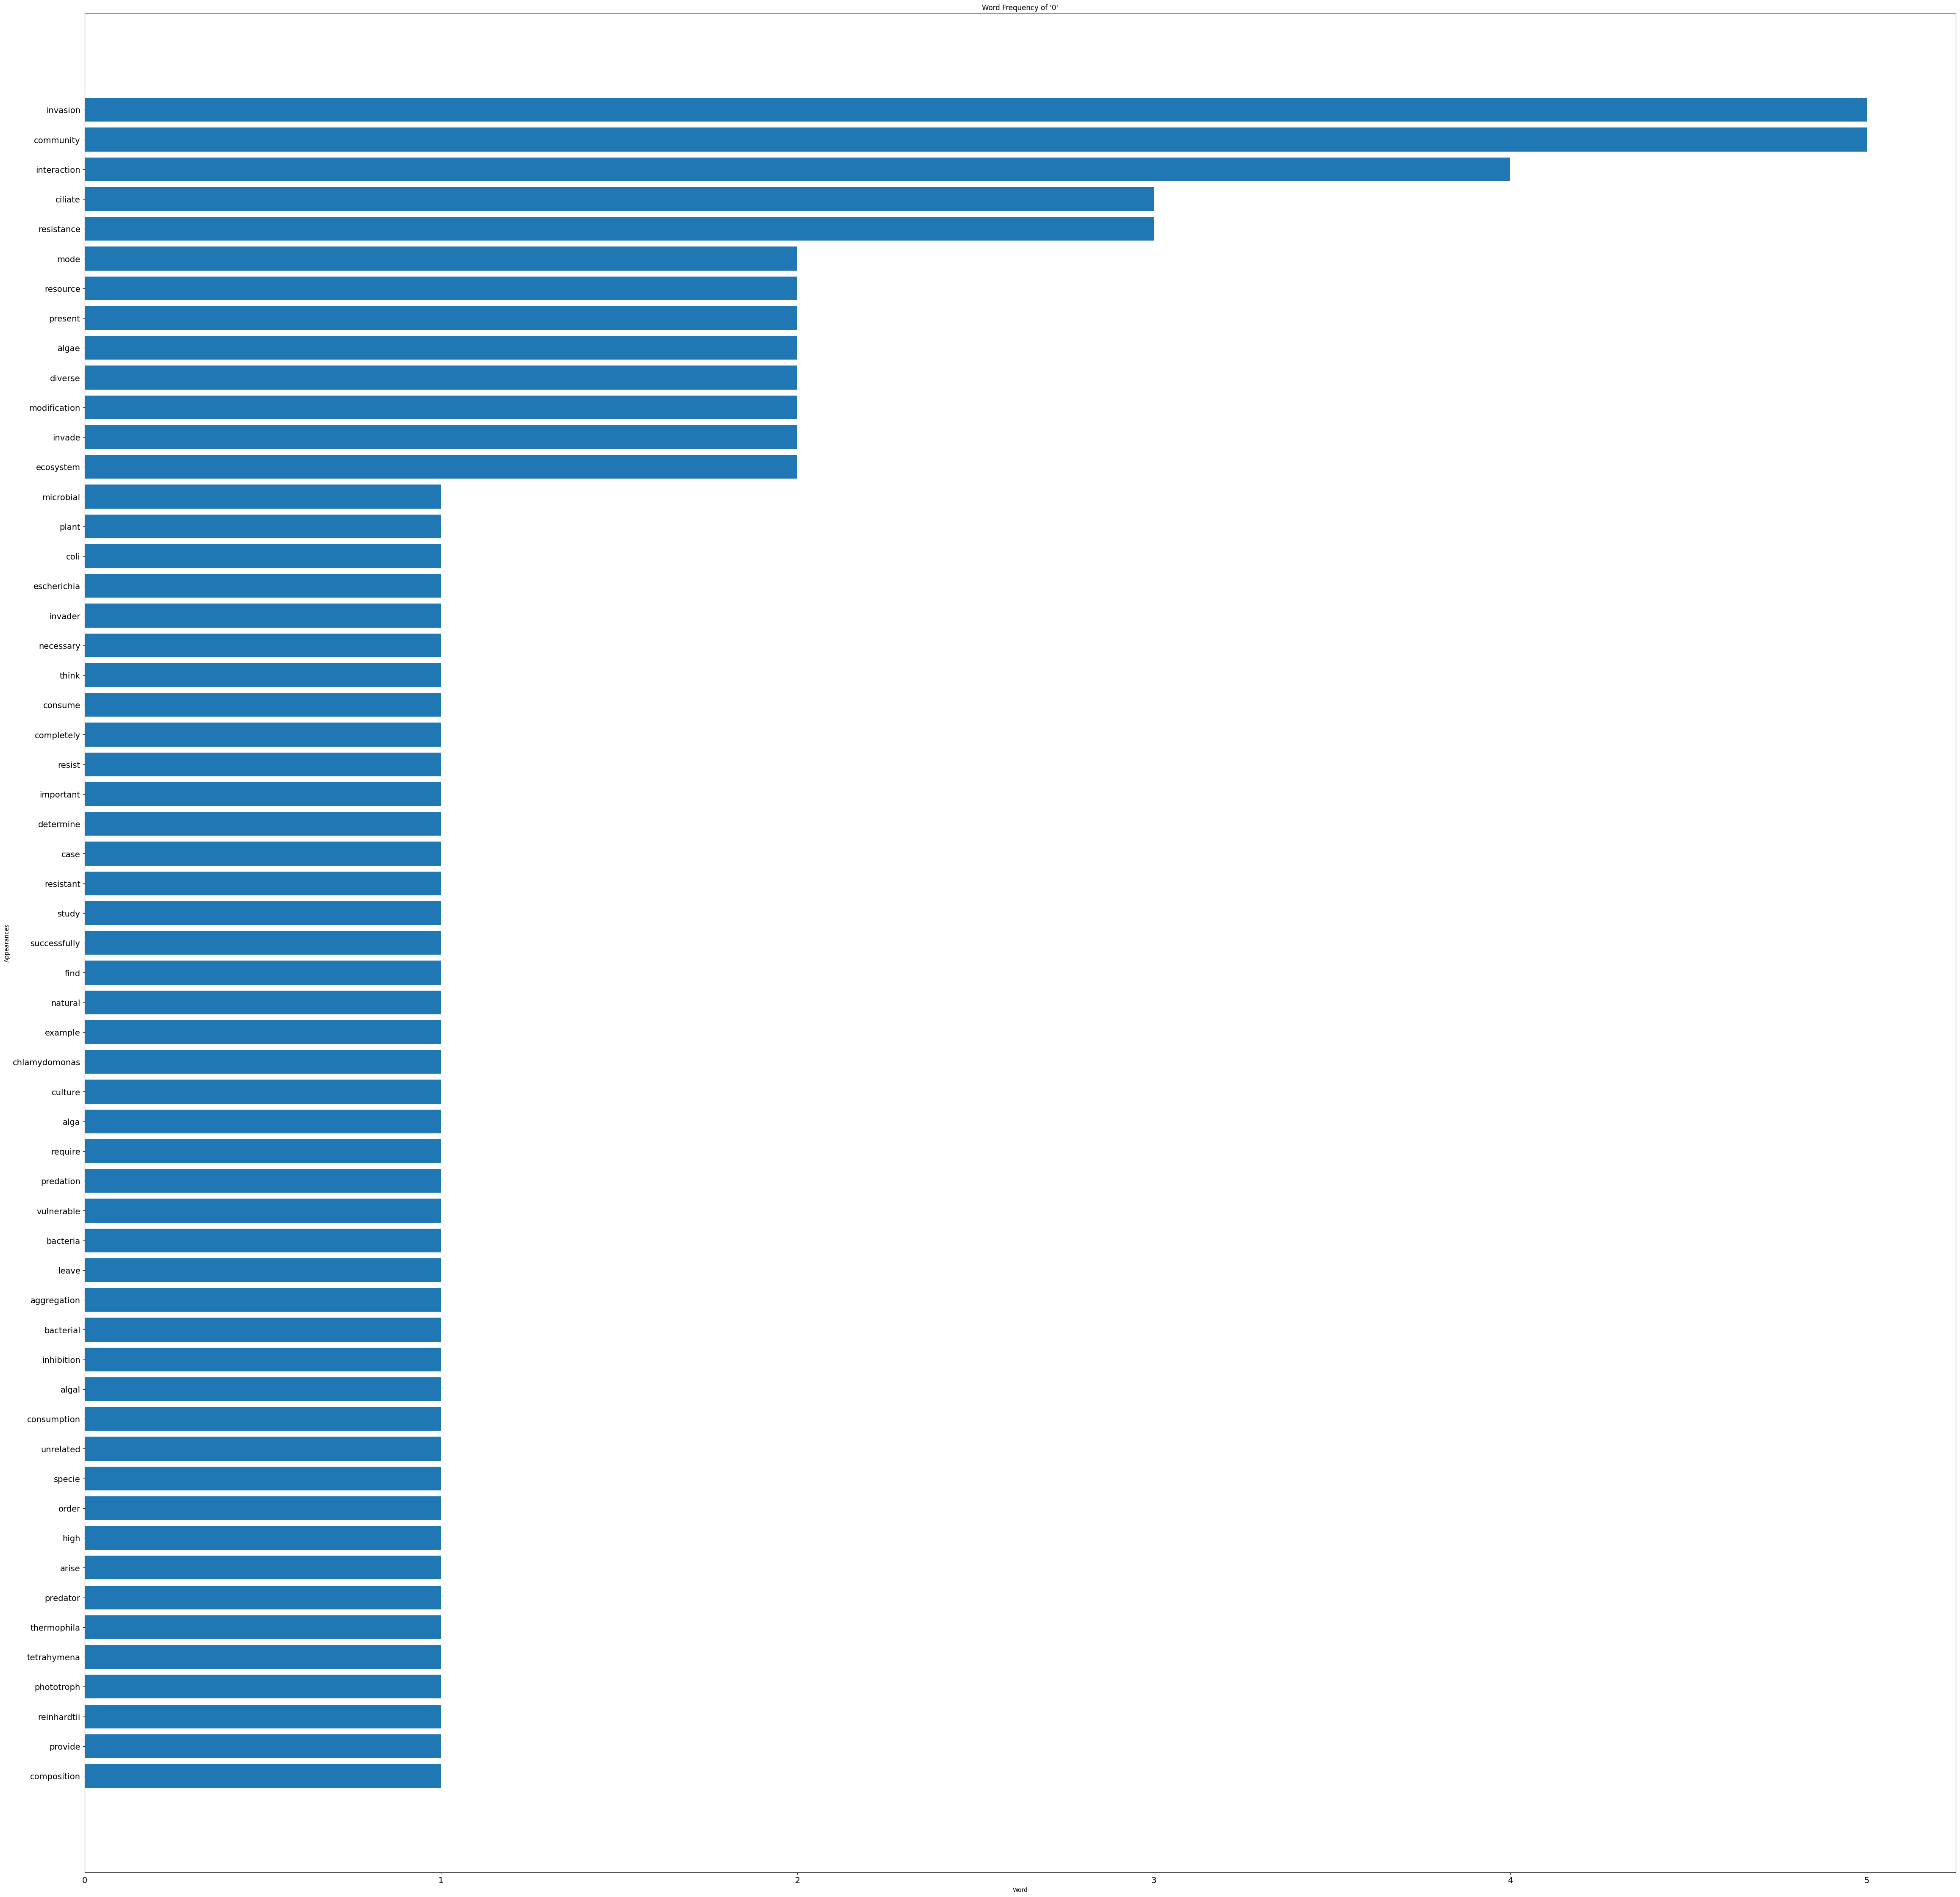

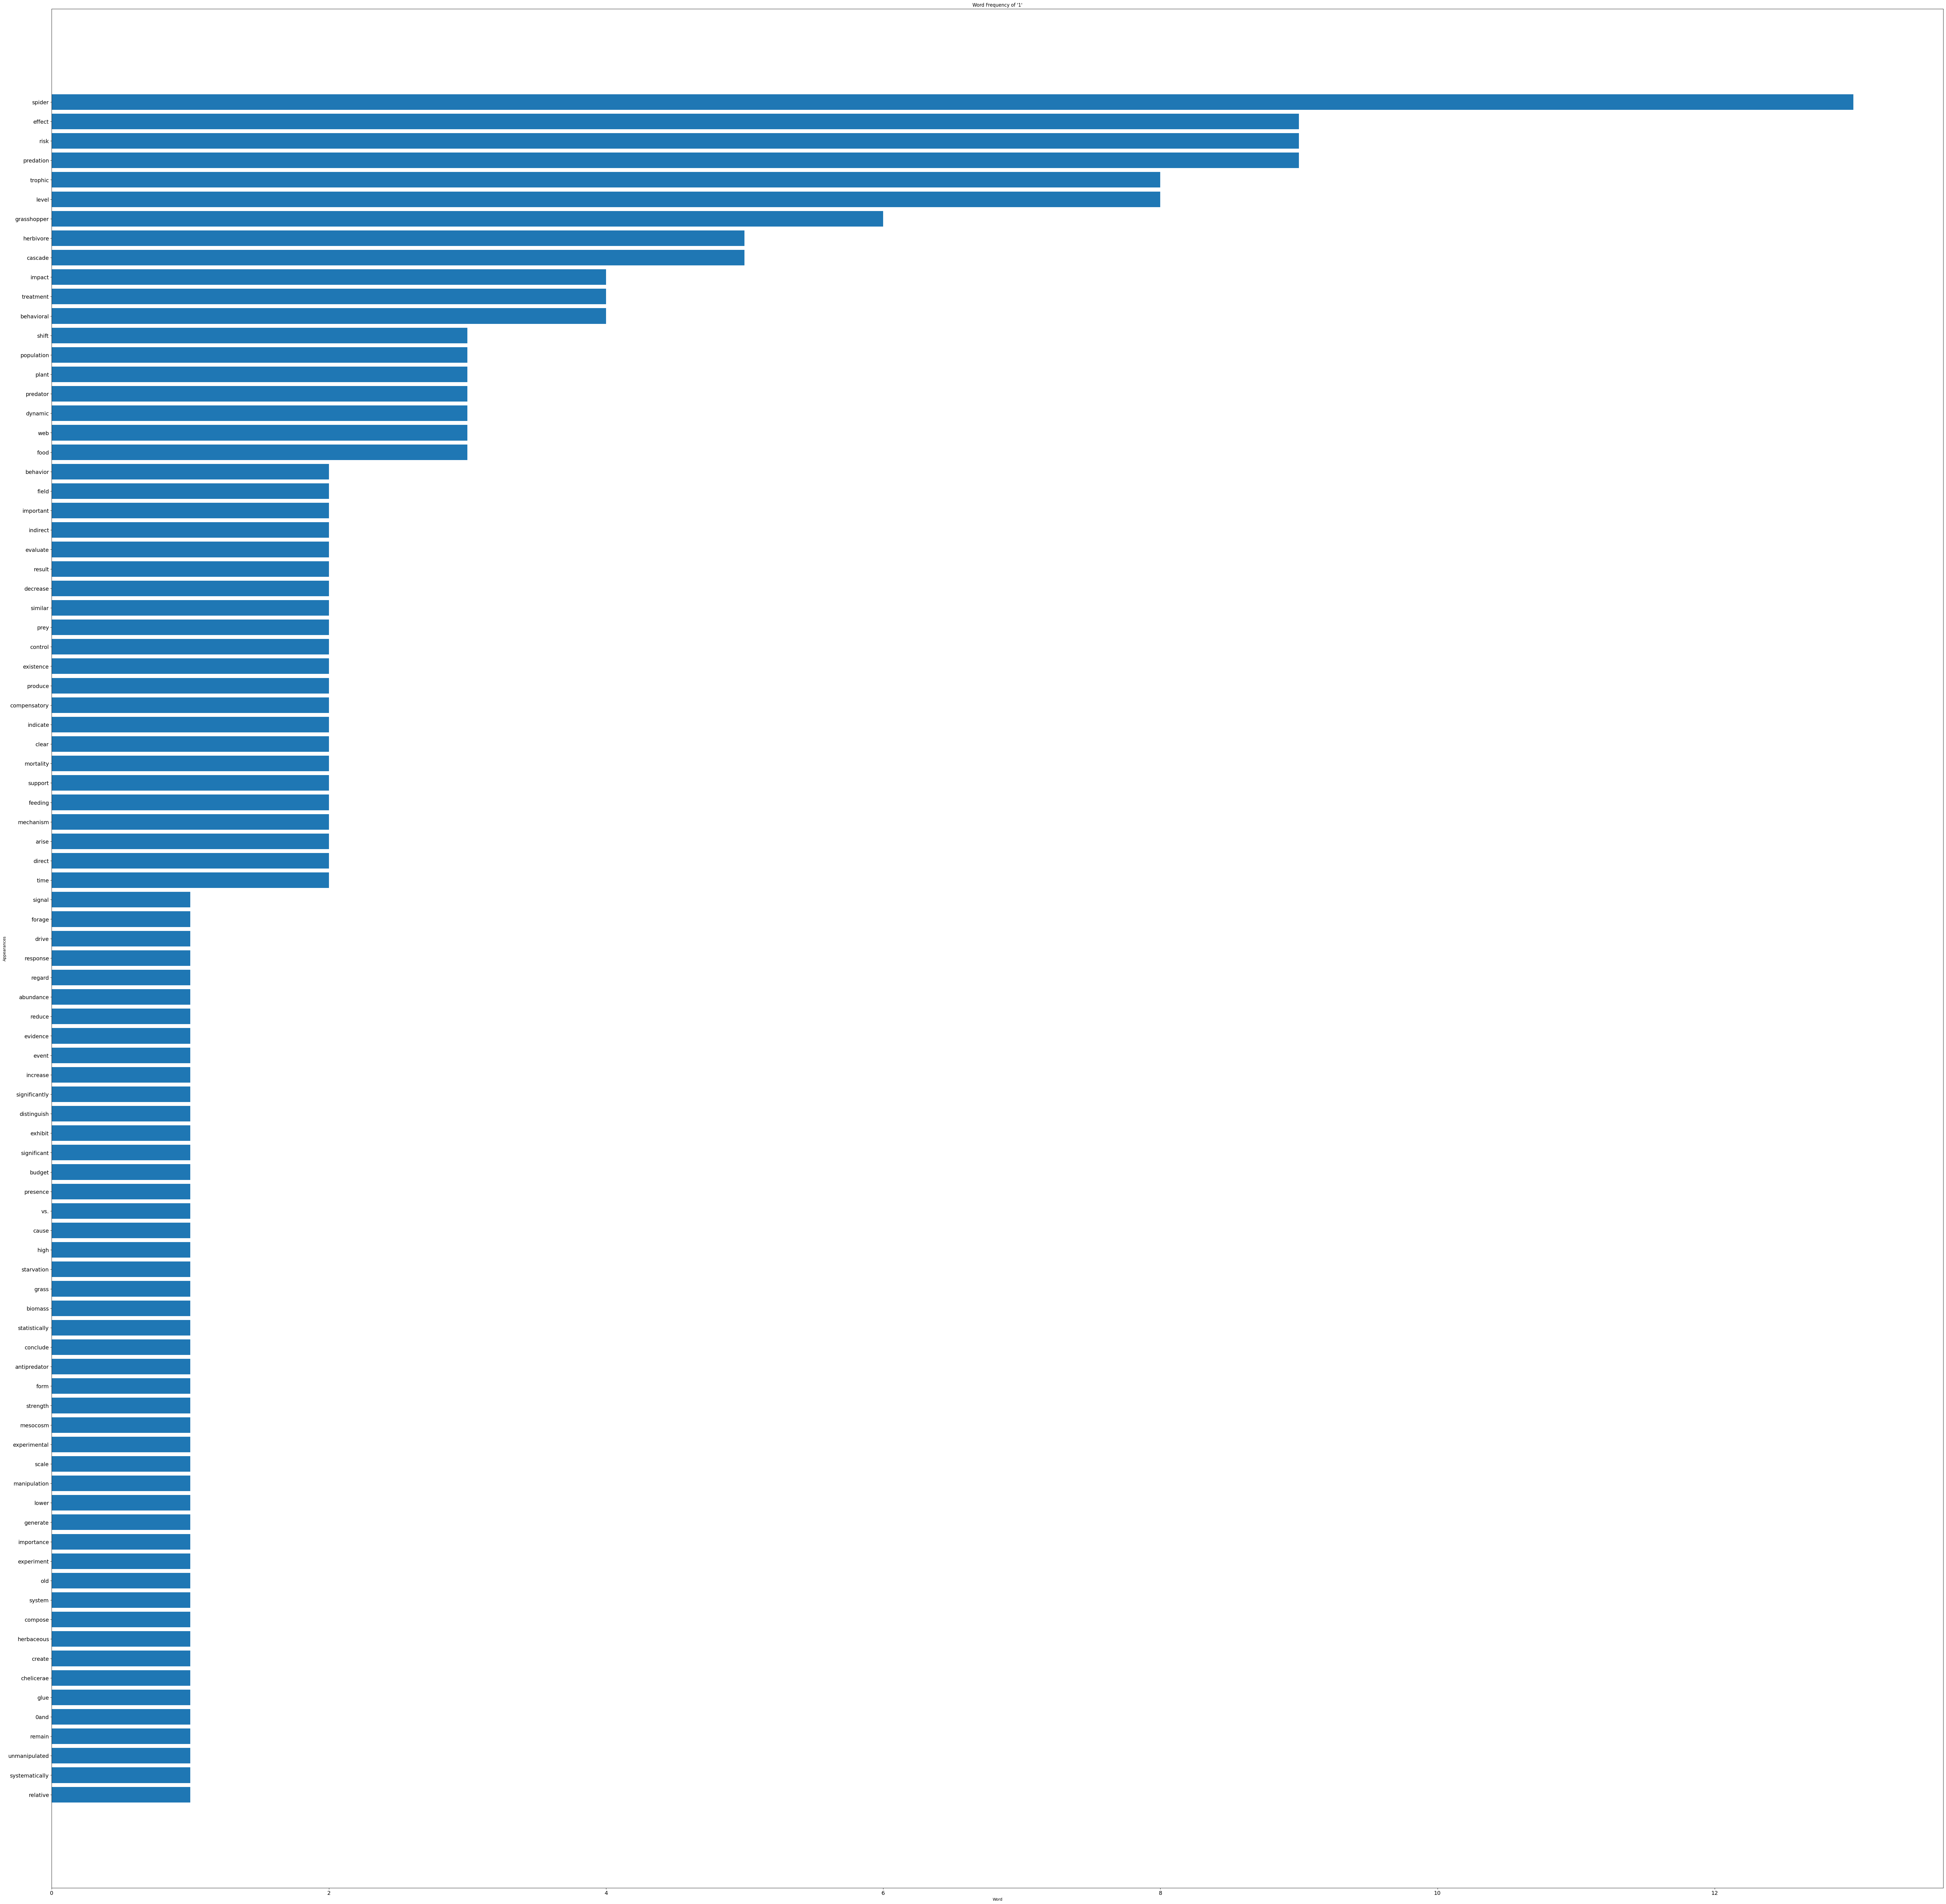

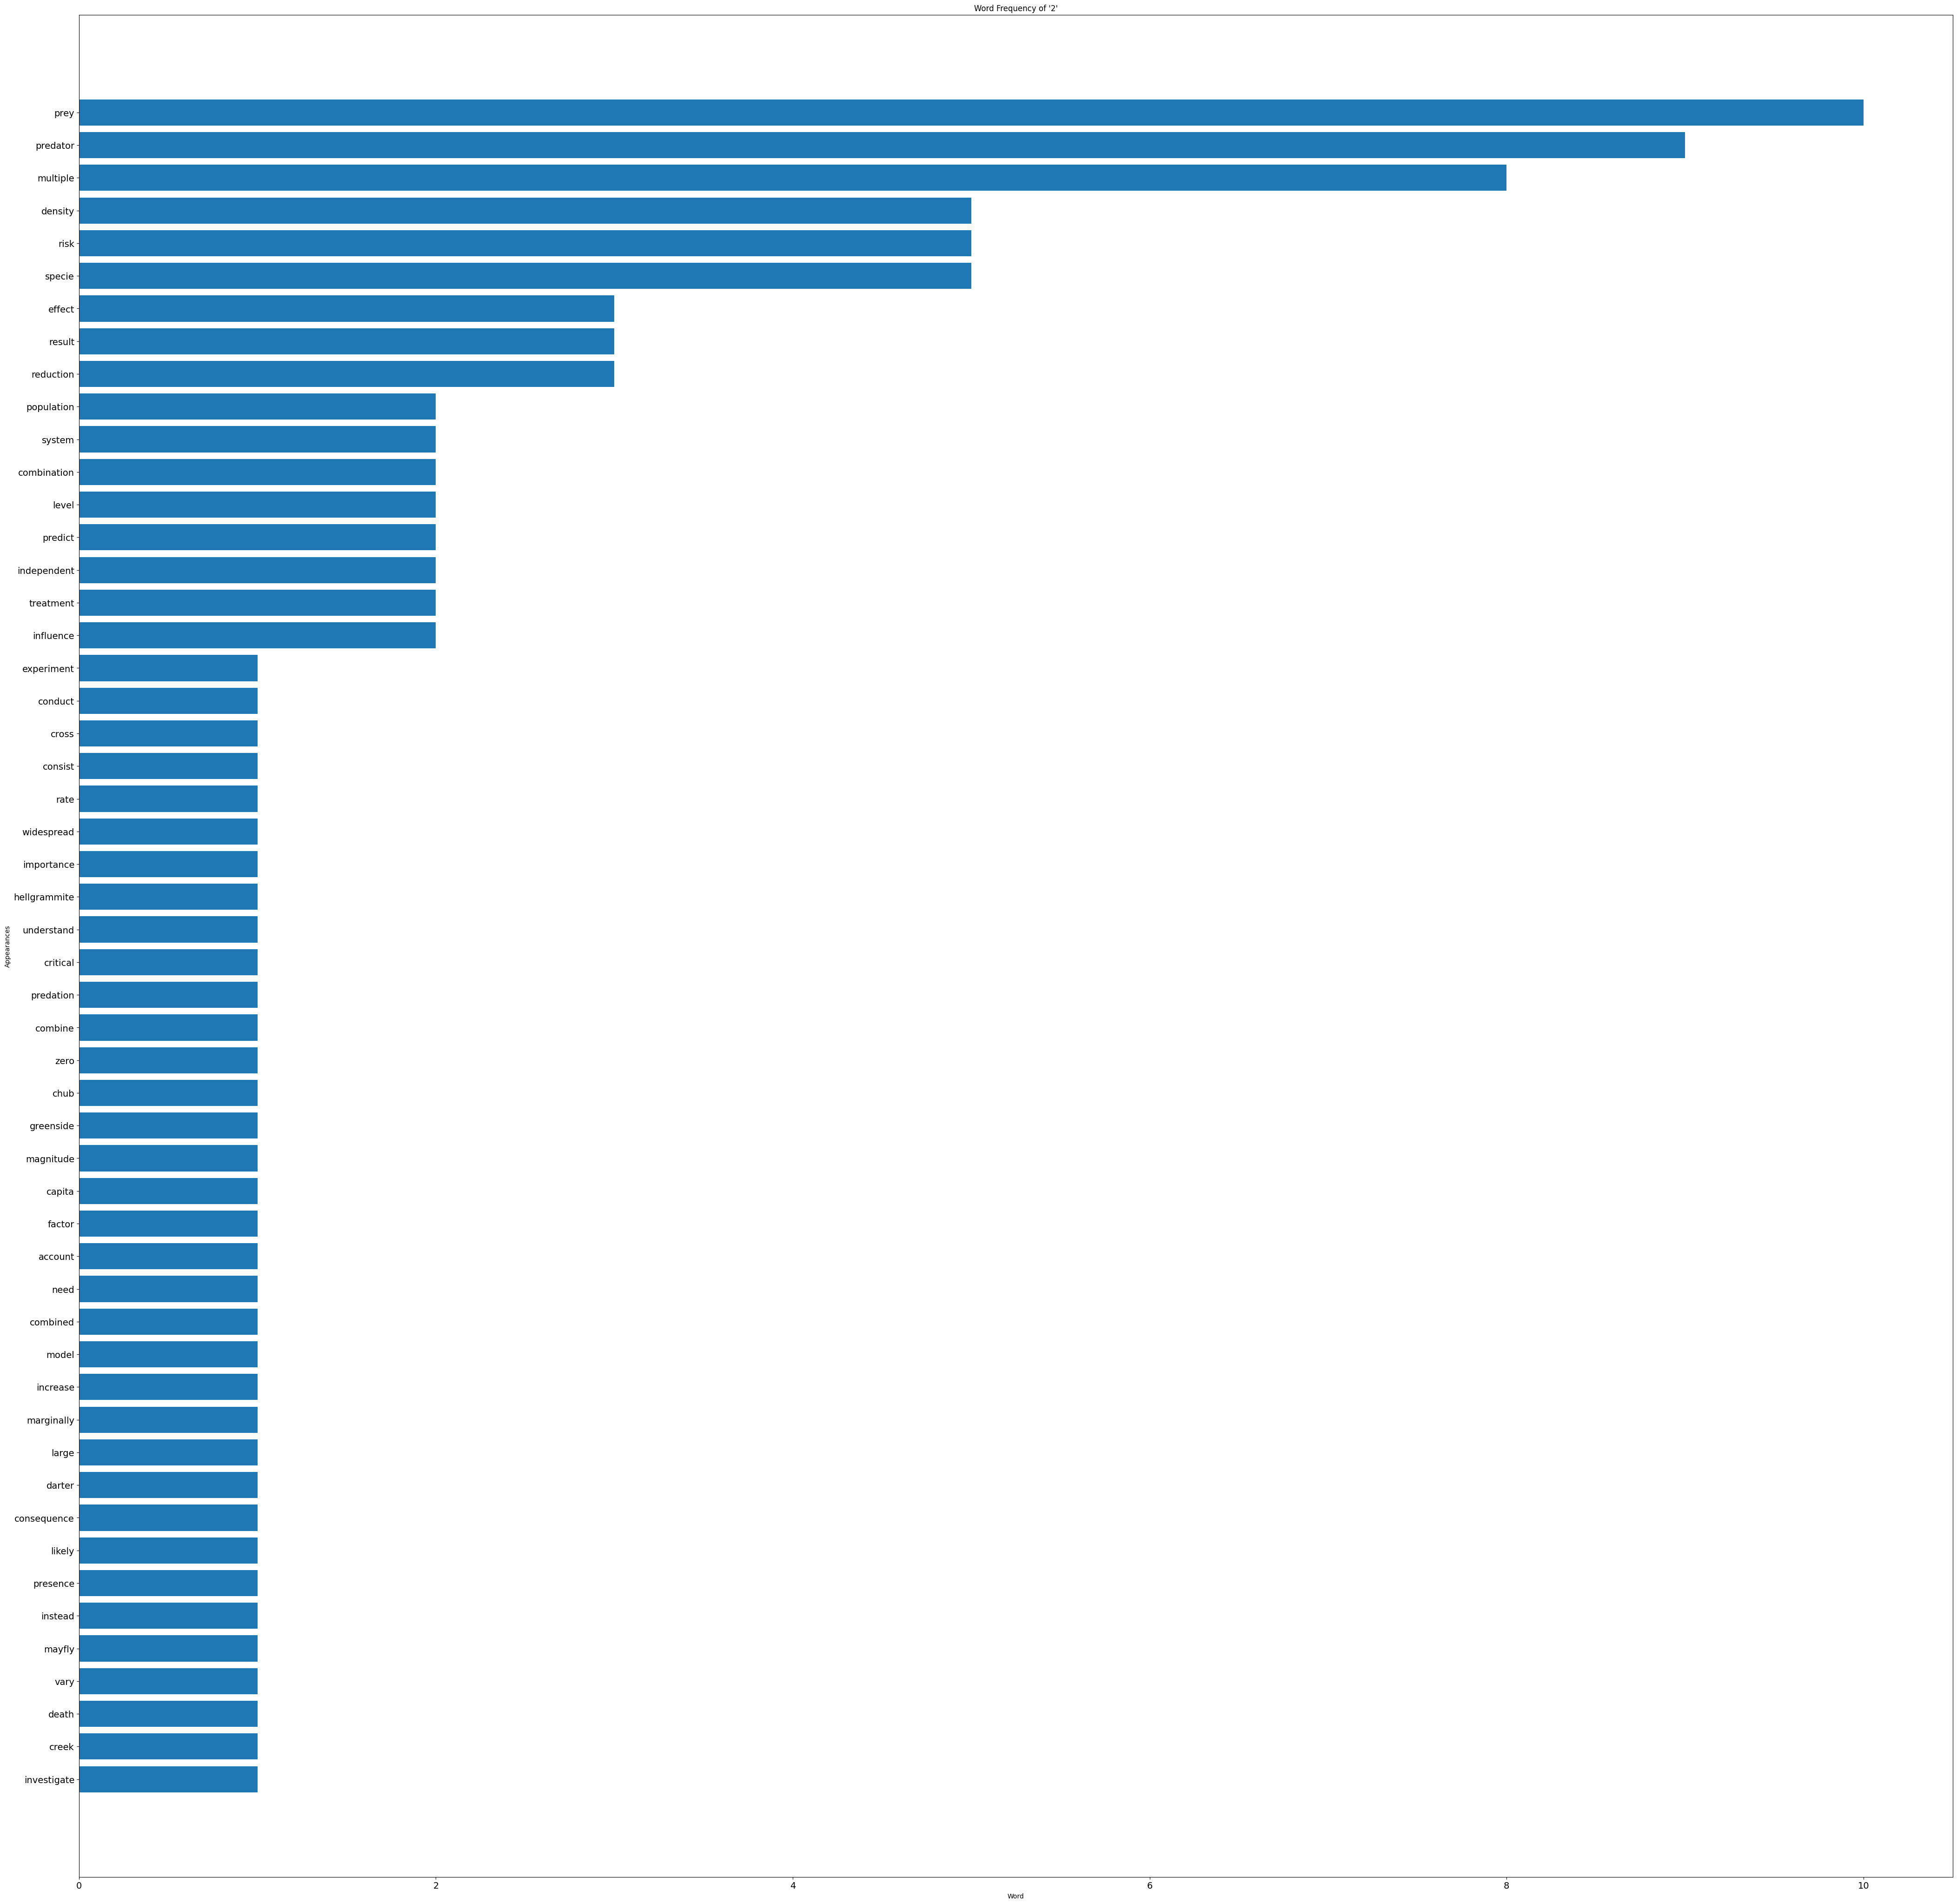

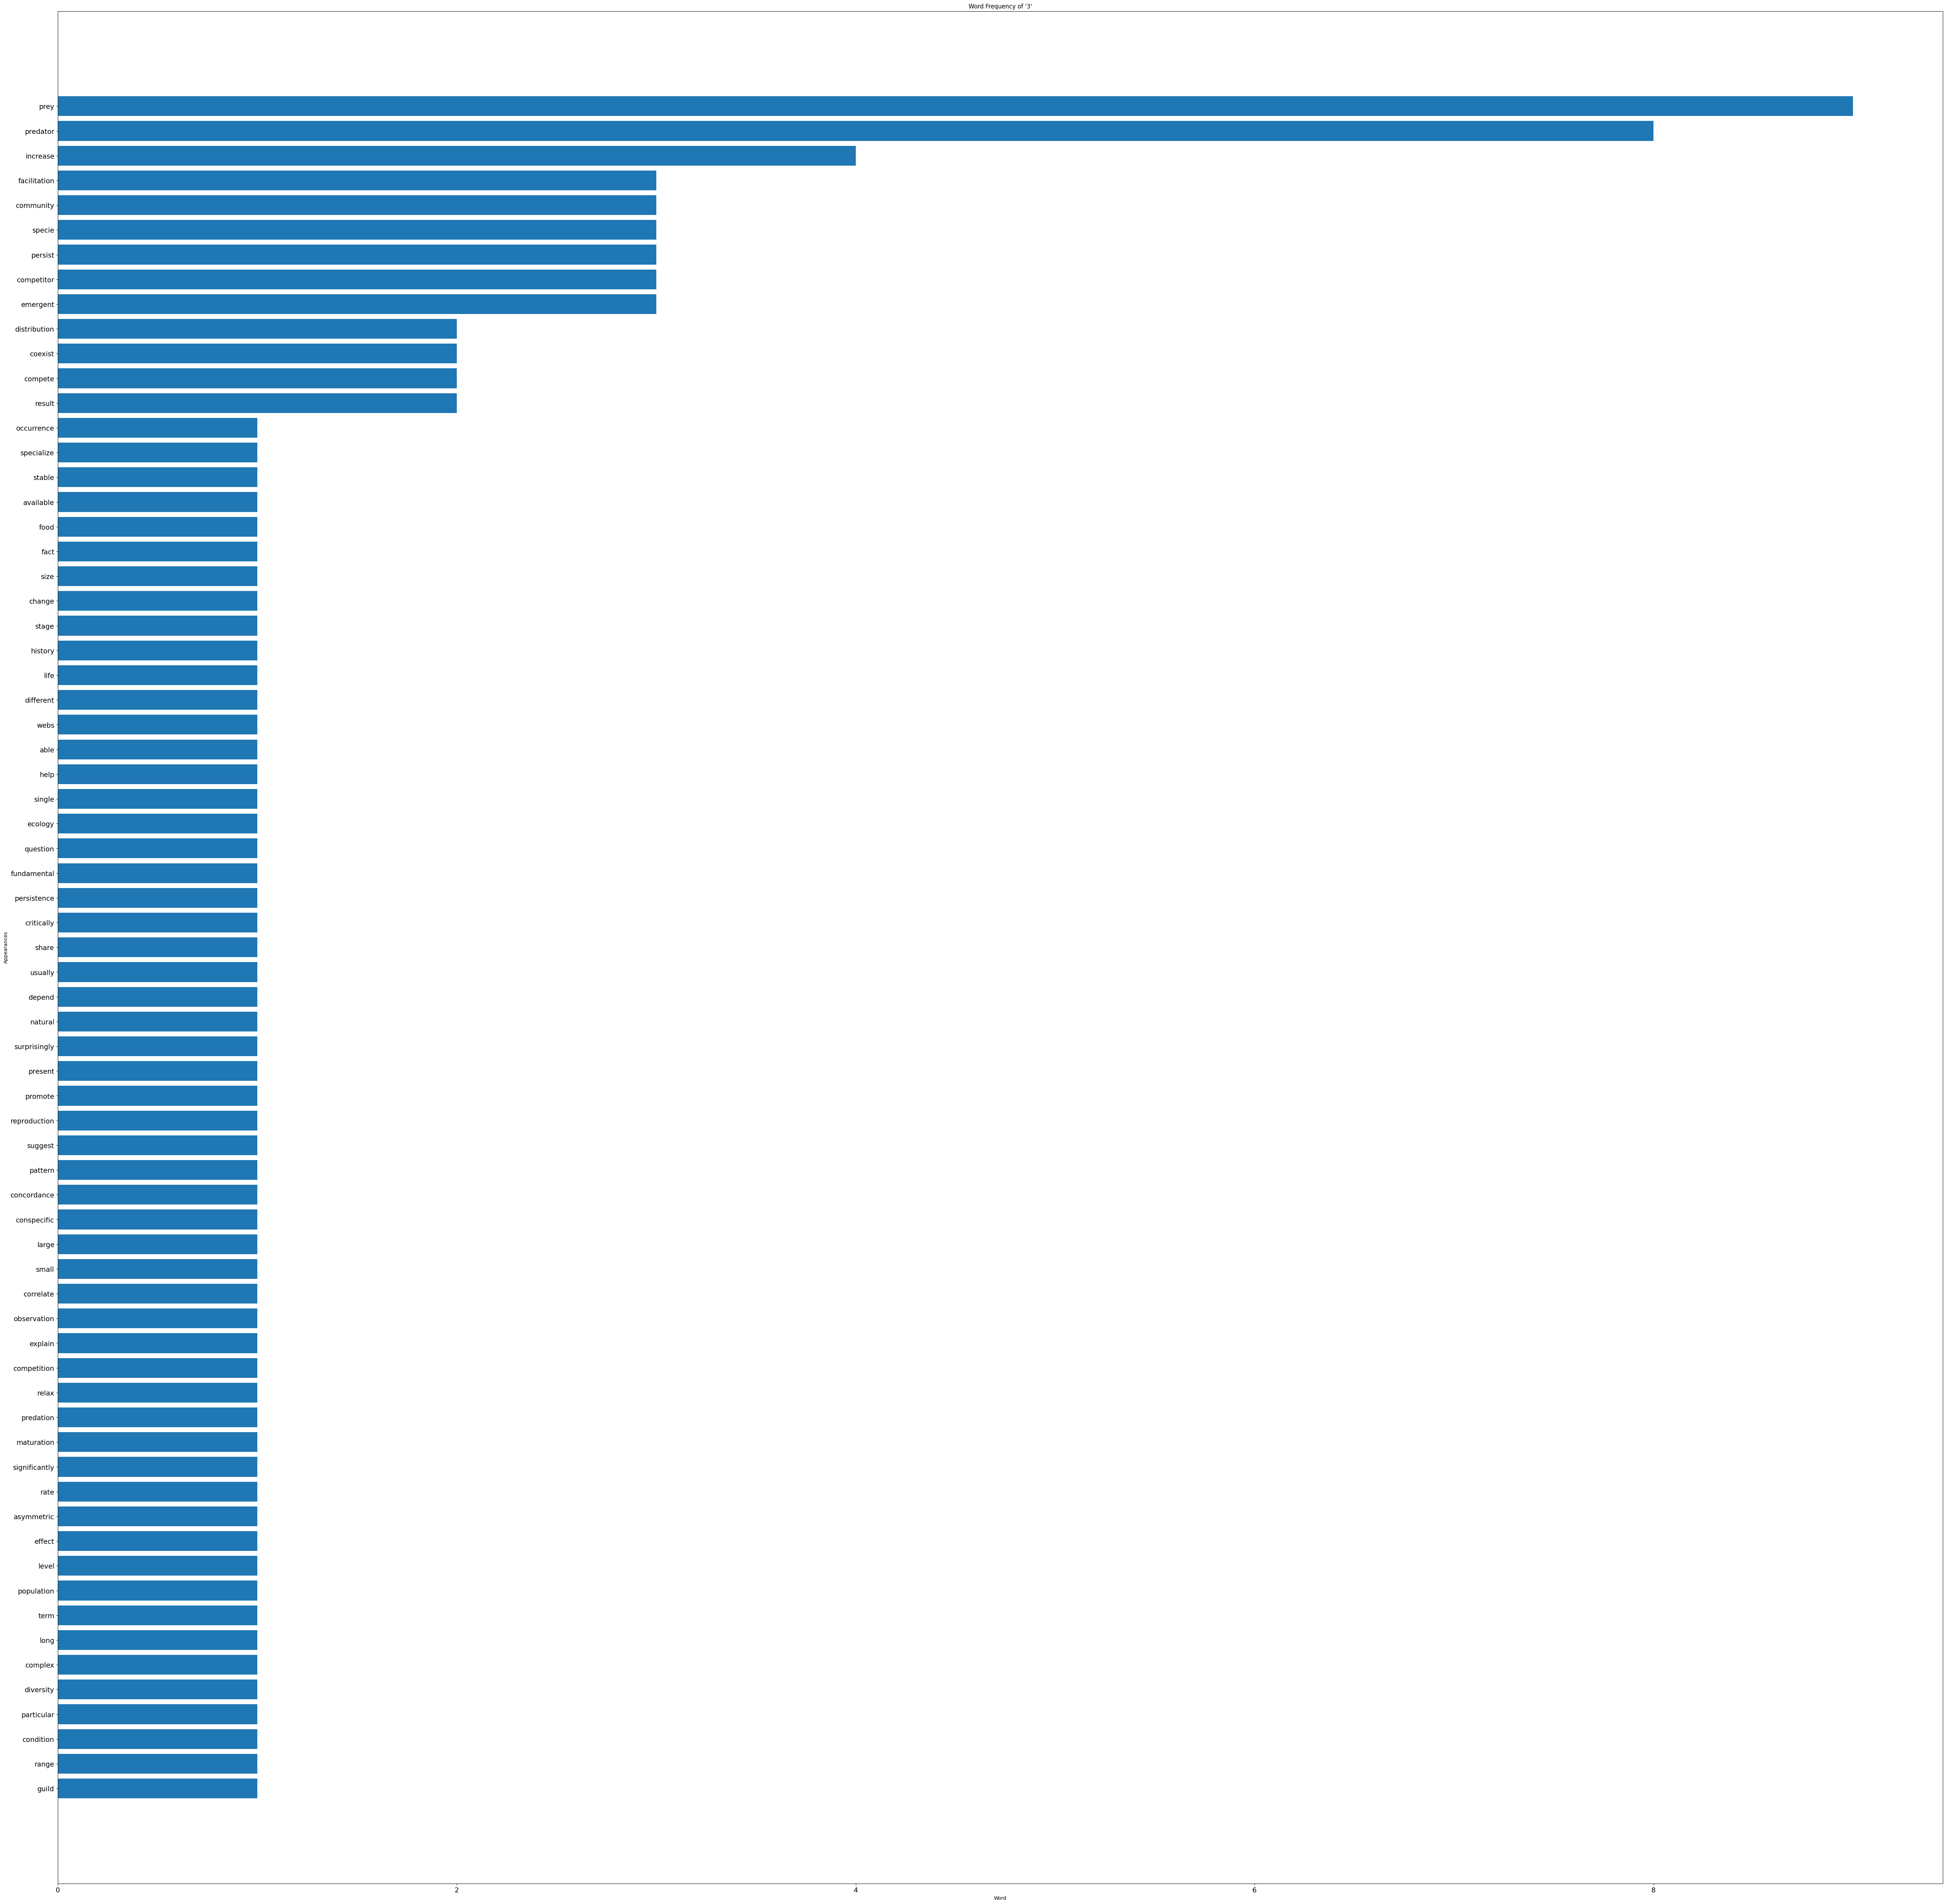

In [6]:
word_freq_keys = word_freq.keys()
for key in word_freq_keys:
    words = np.array(list(word_freq[key].keys()))
    counts = np.array(list(word_freq[key].values()))
    sorted = np.argsort(counts)

    plt.figure(figsize=(1 * len(words), 1 * len(words)))
    plt.barh(words[sorted], counts[sorted])
    plt.title(f'Word Frequency of \'{key}\'')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Word')
    plt.ylabel('Appearances')
    # plt.show()
    plt.savefig(f"frequency{key}.png")